# Pendulum

The inverted pendulum swingup problem is a classic problem in the control literature. 

In this version of the problem:
- The pendulum starts in a random position.
- And the goal is to swing it up so it stays upright.

We will train Deep Deterministic Policy Gradients (DDPG) with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import time
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gym import envs
print(len(envs.registry.all()))

859


### 2. Instantiate the Environment and Agent

There are three observation inputs for this environment, representing 
- The angle of the pendulum (0 and 1).
- And its angular velocity (2).

The action 
- It is a value between -2.0 and 2.0, 
- It is representing the amount of left or right force on the pendulum.

In [3]:
# Instantiate the Environment
env = gym.make('Pendulum-v0')
env.seed(2)

print('State space: \t', env.observation_space)
print('Action space: \t', env.action_space)

State space: 	 Box(3,)
Action space: 	 Box(1,)


In [4]:
# Instantiate the Agent

from ddpg_agent import Agent

agent = Agent(state_size=3, action_size=1, random_seed=2) 

In [5]:
# Watch the untrained agent
state = env.reset()
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break
env.close()

/home/docai/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### 3. Train the Agent with DDPG

In [10]:
def ddpg(n_episodes=1000, max_t=300, print_every=100):
    """
    Deep Deterministic Policy Gradients (DDPG)
    
    Params:
    =======
    - n_episodes (int): maximum number of training episodes 
    - max_t (int): maximum number of timesteps per episode
    - print_every
    """
    start = time.time()
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_deque.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor1.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic1.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
    print('Time: {:.3f} minutes'.format((time.time()-start)/60))
    return scores

scores = ddpg()

Episode 100	Average Score: -1152.70
Episode 200	Average Score: -709.395
Episode 300	Average Score: -704.72
Episode 400	Average Score: -719.95
Episode 500	Average Score: -701.01
Episode 600	Average Score: -678.87
Episode 700	Average Score: -663.85
Episode 800	Average Score: -534.88
Episode 900	Average Score: -481.31
Episode 1000	Average Score: -701.97
Time: 62.560 minutes


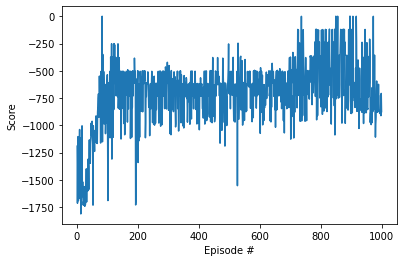

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4.Watch a Smart Agent

In [7]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor1.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic1.pth'))

state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break
        
env.close()

## The Correction in Ornstein-Uhlenbeck Process 

Using alternative Ornstein-Uhlenbeck Process code 

- dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
- dx = self.theta * (self.mu - x) + self.sigma * (np.random.standard_normal(size=x.shape))

In [4]:
# Instantiate the Agent
from ddpg_agent2 import Agent
agent2 = Agent(state_size=3, action_size=1, random_seed=2)

### 5. Train the Agent with the New Ornsteiin-Uhlenbeck Process

In [7]:
def ddpg2(n_episodes=1000, max_t=300, print_every=100):
    """
    Deep Deterministic Policy Gradients (DDPG)
    Params:
    =======
    - n_episodes (int): maximum number of training episodes
    - max_t (int): maximum number of timesteps per episode
    - print_every
    """
    start = time.time()
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent2.reset()
        score = 0
        for t in range(max_t):
            action = agent2.act(state)
            next_state, reward, done, _ = env.step(action)
            agent2.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_deque.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
        torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
    print('Time: {:.3f} minutes'.format((time.time() - start)/60))
    return scores

scores = ddpg2()

Episode 100	Average Score: -1175.68
Episode 200	Average Score: -787.106
Episode 300	Average Score: -503.42
Episode 400	Average Score: -461.84
Episode 500	Average Score: -433.01
Episode 600	Average Score: -453.52
Episode 700	Average Score: -473.50
Episode 800	Average Score: -429.35
Episode 900	Average Score: -508.40
Episode 1000	Average Score: -516.31
Time: 58.715 minutes


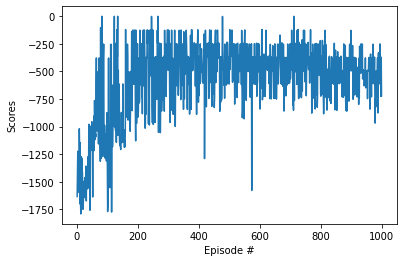

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Scores')
plt.xlabel('Episode #')
plt.show()

# Batch Normalization

In [10]:
# Instantiate the Agent
from ddpg_agent2 import Agent
agent2 = Agent(state_size=3, action_size=1, random_seed=2)

### 6. Train the Agent with Batch Normalization

In [11]:
def ddpg2(n_episodes=1000, max_t=300, print_every=100):
    """
    Deep Deterministic Policy Gradients (DDPG)
    Params:
    =======
    - n_episodes (int): maximum number of training episodes
    - max_t (int): maximum number of timesteps per episode
    - print_every
    """
    start = time.time()
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent2.reset()
        score = 0
        for t in range(max_t):
            action = agent2.act(state)
            next_state, reward, done, _ = env.step(action)
            agent2.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_deque.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
        torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
    print('Time: {:.3f} minutes'.format((time.time() - start)/60))
    return scores

scores = ddpg2()

ValueError: expected 2D or 3D input (got 1D input)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Scores')
plt.xlabel('Episode #')
plt.show()